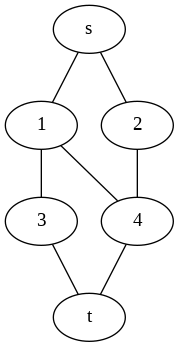

In [ ]:
import pydotplus
from IPython.display import Image, display
# Creazione del grafo
graph = pydotplus.Dot(graph_type='graph')
# Aggiunta dei nodi
nodes = ['s', 't'] + [str(i) for i in range(1, 5)]
for node in nodes:
    graph.add_node(pydotplus.Node(node))

# Aggiunta degli archi
edges = [('s', 1), ('s', 2), (1, 3), (1, 4), (2, 4), (3, 't'), (4, 't')]
for edge in edges:
    graph.add_edge(pydotplus.Edge(str(edge[0]), str(edge[1])))

# Display del grafo direttamente nell'output
display(Image(graph.create_png()))

### Problem 1

# Report: Problema 1 - Calcolo del Valore di Shapley

## Introduzione al Problema:
Il problema si situa in un contesto di grafo non diretto $G = (N, E)$, dove $N = \{1,2,\dots,n\} \cup \{s, t\}$ rappresenta l'insieme dei nodi, con $s$ e $t$ come nodi sorgente e destinazione distinti. L'obiettivo è definire un percorso che connetta $s$ e $t$, attraverso i nodi in $\{1,2,\dots,n\}$, con ciascuno di essi controllato da un agente. In seguito, tali nodi sono trasparentemente considerati come gli agenti corrispondenti.

## Metodologia di Risoluzione:
1. **Creazione del Grafo:**
   - Utilizziamo la libreria `pydotplus` per creare il grafo non diretto.
2. **Funzione Caratteristica:**
   - Definiamo una funzione `simple_characteristic_function` che valuta se un insieme di agenti può formare un percorso tra $s$ e $t$ nel grafo.
3. **Calcolo del Valore di Shapley:**
   - Implementiamo la formula del valore di Shapley per calcolare equamente la contribuzione di ciascun agente nella formazione del percorso.

## Risultati e Analisi:
- **Funzione Caratteristica:**
  - La funzione caratteristica assegna un valore di $100$ se un insieme di agenti può formare un percorso tra $s$ e $t$, altrimenti $0$.
- **Valore di Shapley:**
  - I valori di Shapley sono calcolati per ciascun agente e rappresentano la sua contribuzione equa nella formazione del percorso.

## Conclusioni:
Il calcolo dei valori di Shapley fornisce un modo equo per distribuire la ricompensa tra gli agenti, incoraggiando la cooperazione nel formare un percorso tra $s$ e $t$ nel grafo.



In [ ]:
from math import factorial
from itertools import combinations

def powerset(list: list):
    subsets = [frozenset(j) for i in range(len(list) + 1) for j in combinations(list, i)]
    return subsets

def __has_path_through_nodes(graph: pydotplus.Dot, start_node: str, end_node: str):
    visited = set()
    queue = [start_node]

    while queue:
        current_node = queue.pop(0)
        if current_node == end_node:
            return True
        if current_node not in visited:
            visited.add(current_node)
            for edge in graph.get_edge_list():
                if edge.get_source() == current_node:
                    queue.append(edge.get_destination())
    return False

def has_path_through_nodes(graph: pydotplus.Dot, nodes_to_delete: frozenset):

    nodes = ['s', 't'] + [str(i) for i in range(1, 5)]
    new_nodes = []
    for node in nodes:
      if node in list(nodes_to_delete):
        new_nodes.append(node)

    edges = [('s', 1), ('s', 2), (1, 3), (1, 4), (2, 4), (3, 't'), (4, 't')]
    new_edges = []
    for edge in edges:
      if edge[0] in list(nodes_to_delete) or edge[1] in list(nodes_to_delete):
        new_edges.append(edge)

      #graph.add_edge(pydotplus.Edge(str(edge[0]), str(edge[1])))
    pruned_graph = pydotplus.Dot(graph_type='graph')
    for node in new_nodes:
      pruned_graph.add_node(pydotplus.Node(node))

# Aggiunta degli archi
    for edge in new_edges:
      pruned_graph.add_edge(pydotplus.Edge(str(edge[0]), str(edge[1])))

    return __has_path_through_nodes(pruned_graph,'s','t')


def simple_characteristic_function(graph: pydotplus.Dot, coalition: frozenset):
    return 100 if has_path_through_nodes(graph, coalition) else 0

In [ ]:

graph_nodes = [1,2,3,4]
coalitions = powerset(graph_nodes)
characteristic_function = {}
for coalition in coalitions:
    characteristic_function[coalition] = simple_characteristic_function(graph, coalition)
print("Characteristic function")
for key, value in characteristic_function.items():
    print(f"{list(key)}: {value}")

Characteristic function
[]: 0
[1]: 0
[2]: 0
[3]: 0
[4]: 0
[1, 2]: 0
[1, 3]: 100
[1, 4]: 100
[2, 3]: 0
[2, 4]: 100
[3, 4]: 0
[1, 2, 3]: 100
[1, 2, 4]: 100
[1, 3, 4]: 100
[2, 3, 4]: 100
[1, 2, 3, 4]: 100


In [ ]:
def one_element_supersets(set: frozenset, list: frozenset):
    list_without_set = list.difference(set)
    supersets = [set.union([j]) for j in list_without_set]
    return supersets

def compute_characteristic_function(graph, graph_nodes: frozenset, coalition, check_path, characteristic_function):
    if coalition in characteristic_function:
        return
    characteristic_function[coalition] = simple_characteristic_function(graph, coalition) if check_path else 100
    check_path = False if characteristic_function[coalition] == 100 else True
    for c in one_element_supersets(coalition, graph_nodes):
        compute_characteristic_function(graph, graph_nodes, c, check_path, characteristic_function)


characteristic_function = {}

compute_characteristic_function(graph, frozenset(graph_nodes), frozenset([]), True, characteristic_function)

print("Characteristic function")
for key, value in characteristic_function.items():
    print(f"{list(key)}: {value}")

Characteristic function
[]: 0
[1]: 0
[1, 2]: 0
[1, 2, 3]: 100
[1, 2, 3, 4]: 100
[1, 2, 4]: 100
[1, 3]: 100
[1, 3, 4]: 100
[1, 4]: 100
[2]: 0
[2, 3]: 0
[2, 3, 4]: 100
[2, 4]: 100
[3]: 0
[3, 4]: 0
[4]: 0


In [ ]:
def shapley_value(player, characteristic_function):
    player_list = max(characteristic_function)
    player = set([player])
    N = len(player_list)
    coalitions = powerset(player_list)
    shapley_val = 0
    for coalition in coalitions:
        if len(coalition) != 0:
            S = len(coalition)
            marginal_contribution = characteristic_function[coalition] - (characteristic_function[coalition - player] if len(coalition - player) > 0 else 0)
            shapley_val += ((factorial(N - S) * factorial(S - 1)) / factorial(N)) * marginal_contribution
    return shapley_val

def shapley(characteristic_function):
    return {player: shapley_value(player, characteristic_function) for player in max(characteristic_function)}

print("Shapley values")
shapley_values = shapley(characteristic_function).items()
for key, value in shapley_values:
    print(f"Agent {key}: {value:.3f}")

Shapley values
Agent 1: 33.333
Agent 2: 16.667
Agent 3: 16.667
Agent 4: 33.333


### Problem 2

# Report: Problema 2 - Schema di Pagamento per una Cooperazione Limitata

## Introduzione al Problema:
Il Problema 2 si concentra sulla progettazione di uno schema di pagamento che incentiverebbe la cooperazione tra agenti nell'affrontare la sfida di collegare i nodi sorgente e destinazione in un grafo non diretto. Tuttavia, gli agenti sono limitati nel loro contributo e possono partecipare solo se al massimo due dei loro vicini partecipano.

## Metodologia di Risoluzione:
1. **Ricerca dei Vicini:**
   - Utilizziamo la funzione `find_neighbors` per identificare i vicini di ciascun agente nel grafo.
2. **Verifica dell'Equilibrio di Nash:**
   - La funzione `is_nash_equilibrium` determina se l'azione di ciascun agente corrisponde a un equilibrio di Nash nel contesto delle restrizioni specificate.
3. **Calcolo dell'Equilibrio di Nash:**
   - Utilizzando la ricorsione, la funzione `find_nash_equilibrium` cerca di trovare un equilibrio di Nash per il gioco.

## Risultati e Analisi:
- **Equilibrio di Nash:**
  - Viene determinato se esiste un equilibrio di Nash nel gioco specificato.
- **Schema di Pagamento:**
  - Se esiste un equilibrio di Nash, vengono presentati gli agenti che contribuiscono e quelli che non contribuiscono, indicando così uno schema di pagamento potenziale.

## Conclusioni:
Lo schema di pagamento progettato fornisce un incentivo per una cooperazione limitata tra gli agenti, garantendo al contempo un equilibrio di Nash nel gioco. Ciò promuove una distribuzione equa della ricompensa e una soluzione ottimale del problema nel contesto delle restrizioni specificate.


In [ ]:
def find_neighbors(graph,target_node_name):
  target_node = None
  for node in graph.get_nodes():
      if str(node.get_name()) == target_node_name:
          target_node = node
          break

  # Ottieni tutti i vicini del nodo di interesse
  if target_node:

      neighbors = []

      for edge in graph.get_edges():

          if edge.get_source() == target_node.get_name():
            neighbors.append(edge.get_destination())
          if edge.get_destination() == target_node.get_name():
            neighbors.append(edge.get_source())
      return neighbors

In [ ]:
print(find_neighbors(graph,"1"))

['s', '3', '4']


In [ ]:
def is_nash_equilibrium(graph, agents, action_profile: dict):
    for agent in agents:
        sum_neighbours = 0
        for neighbour in find_neighbors(graph,str(agent)):
            if neighbour.isdigit():
              sum_neighbours += action_profile[int(neighbour)]
            else:
              sum_neighbours += action_profile[neighbour]
        if (sum_neighbours > 2 and action_profile[agent] == 1) or (sum_neighbours <= 2 and action_profile[agent] == 0):
            return False
    return True

def find_nash_equilibrium(graph, agents: list,action_profile: dict, i=0):
    for choice in range(2):
        action_profile[agents[i]] = choice
        if i == len(agents) - 1:
            if is_nash_equilibrium(graph, agents, action_profile):
                return action_profile
        elif find_nash_equilibrium(graph, agents, action_profile, i + 1) is not None:
            return action_profile
    return None

equilibrium = find_nash_equilibrium(graph, graph_nodes, {'s': 1, 't': 1})
print(equilibrium)

if equilibrium is not None:
    print("Nash equilibrium:")
    del equilibrium['s']
    del equilibrium['t']
    for key, value in equilibrium.items():
        print(f"Agent {key} {'contributes' if value else 'does not contribute'}")
else:
    print("Nash equilibrium not found")

{'s': 1, 't': 1, 1: 0, 2: 1, 3: 1, 4: 1}
Nash equilibrium:
Agent 1 does not contribute
Agent 2 contributes
Agent 3 contributes
Agent 4 contributes


In [ ]:
def check_equilibrium(graph, players, action_profile: dict):
    for player in players:
        sum_neighbours = 0
        for neighbor in find_neighbors(graph, str(player)):
            if neighbor.isdigit():
                sum_neighbours += action_profile[int(neighbor)]
            else:
                sum_neighbours += action_profile[neighbor]
        if (sum_neighbours > 2 and action_profile[player] == 1) or (sum_neighbours <= 2 and action_profile[player] == 0):
            return False
    return True

def find_equilibrium(graph, players: list, action_profile: dict, i=0):
    for choice in range(2):
        action_profile[players[i]] = choice
        if i == len(players) - 1:
            if check_equilibrium(graph, players, action_profile):
                return action_profile
        elif find_equilibrium(graph, players, action_profile, i + 1) is not None:
            return action_profile
    return None

equilibrium = find_equilibrium(graph, graph_nodes, {'s': 1, 't': 1})
print(equilibrium)

if equilibrium is not None:
    print("Equilibrium found:")
    del equilibrium['s']
    del equilibrium['t']
    for key, value in equilibrium.items():
        print(f"Player {key} {'contributes' if value else 'does not contribute'}")
else:
    print("Equilibrium not found")


{'s': 1, 't': 1, 1: 0, 2: 1, 3: 1, 4: 1}
Equilibrium found:
Player 1 does not contribute
Player 2 contributes
Player 3 contributes
Player 4 contributes


### Problem 3
#### Problem definition
Assume that G has treewidth bounded by some constant and provide again answer to point 2, by
exploiting this additional information.

#### Problem solution
With the newfound understanding that the graph possesses bounded treewidth, we can leverage Courcelle's theorem, which posits that any problem formulated within Monadic Second Order Logic (MSO) on graphs of bounded treewidth can be resolved in linear time.

By capitalizing on this theorem, we can articulate the $[\sigma_{<=2}, \rho_{>=3}]$-set problem in Monadic Second Order Logic and consequently establish the existence of an algorithm capable of resolving the problem within linear time complexity. This is achieved through the construction of partial solutions on the tree decomposition, provided that the tree decomposition of the original graph exhibits bounded treewidth.

The problem's definition in Monadic Second Order Logic is derived from an adaptation of the "3-edge-coloring" problem definition.

∃C1, C2, C3 (∀x∀y (E(x, y) → (C1(x, y) ∨ C2(x, y) ∨ C3(x, y))) ∧ ∀x
∀y∀z (E(x, y) ∧ E(x, z) ∧ y ̸ = z → (¬ (C1(x, y) ∧ C1(x, z))
∧¬ (C2(x, y) ∧ C2(x, z)) ∧ ¬ (C3(x, y) ∧ C3(x, z))


Furthermore, prior research [2,3] has demonstrated that the $[\sigma,\rho]$-set problem, where both $\sigma$ and $\rho$ are either finite or cofinite, can be efficiently solved on graphs with bounded treewidth using fixed-parameter tractable algorithms. This result directly applies to our scenario, as $\sigma$ is finite and $\rho$ is cofinite.

In summary, this approach affords a rapid solution to a complex problem on such graphs, harnessing their structural characteristics and employing a sophisticated logic framework.

### Problem 4

# Report: Problema 3 - Schema di Pagamento VCG per una Dichiarazione Onesta di Utilità

## Introduzione al Problema:
Il Problema 3 riguarda la progettazione di uno schema di pagamento che incentivi una dichiarazione onesta dell'utilità degli agenti coinvolti nella formazione di un percorso in un grafo non diretto. Gli agenti possono dichiarare l'utilità desiderata, ma potrebbero avere un incentivo a mentire. L'obiettivo è massimizzare l'utilità complessiva del percorso, tenendo conto delle dichiarazioni e delle azioni degli agenti.

## Metodologia di Risoluzione:
1. **Ricerca di Tutti i Percorsi Possibili:**
   - Utilizziamo la funzione `find_all_simple_paths` per identificare tutti i percorsi possibili tra il nodo sorgente e il nodo destinazione nel grafo.
2. **Calcolo dell'Utilità Ottimale:**
   - Determiniamo l'utilità ottimale per ciascun percorso possibile, tenendo conto delle dichiarazioni di utilità degli agenti.
3. **Determinazione dello Schema di Pagamento VCG:**
   - Progettiamo uno schema di pagamento che segua i principi della Vickrey-Clarke-Groves (VCG), compensando gli agenti in base al loro contributo marginale all'utilità complessiva, indipendentemente dalle loro dichiarazioni.

## Risultati e Analisi:
- **Utilità Ottimale:**
  - Identifichiamo il percorso che massimizza l'utilità complessiva, considerando le dichiarazioni di utilità degli agenti.
- **Schema di Pagamento VCG:**
  - Proponiamo uno schema di pagamento che segue i principi della VCG, incentivando una dichiarazione onesta dell'utilità da parte degli agenti e garantendo una soluzione ottimale del problema.

## Conclusioni:
Lo schema di pagamento VCG progettato fornisce un incentivo per una dichiarazione onesta dell'utilità da parte degli agenti, promuovendo così una migliore gestione delle risorse e una soluzione ottimale del problema nel contesto del grafo non diretto.



In [ ]:
import pydotplus

def find_all_simple_paths(graph, start, end, path=[]):
    path = path + [start]
    if start == end:
        return [path]

    # Check if the start node is in the graph
    if start in graph.obj_dict['nodes']:
        paths = []
        for edge in graph.get_edge_list():
            src, dest = edge.get_source(), edge.get_destination()
            if src == start and dest not in path:
                new_paths = find_all_simple_paths(graph, dest, end, path)
                for new_path in new_paths:
                    paths.append(new_path)
        return paths
    else:
        return []

paths = find_all_simple_paths(graph, 's', 't')
print(paths)

additional_path = [str(g) for g in graph_nodes]
additional_path.extend(['s', 't'])
paths.append(additional_path)
print(paths)

[['s', '1', '3', 't'], ['s', '1', '4', 't'], ['s', '2', '4', 't']]
[['s', '1', '3', 't'], ['s', '1', '4', 't'], ['s', '2', '4', 't'], ['1', '2', '3', '4', 's', 't']]


In [ ]:
def get_hidden_type(agent):
    return agent * 10

def get_declared_type(agent):
    return get_hidden_type(agent)

def get_optimal_outcome_without_agent(paths, agent):
    optimal_outcome = 0
    for path in paths:
        if str(agent) not in path:
            outcome = 0
            for node in path:
                if node != "s" and node != "t":
                    outcome += get_declared_type(int(node))
            optimal_outcome = outcome if outcome > optimal_outcome else optimal_outcome
    return optimal_outcome

def get_optimal_outcome(paths):
    optimal_outcome = 0
    optimal_outcome_path = []
    for path in paths:
        outcome = 0
        for agent in path:
            if agent != "s" and agent != "t":
                outcome += get_declared_type(int(agent))
        if outcome > optimal_outcome:
            optimal_outcome = outcome
            optimal_outcome_path = path
    return optimal_outcome, optimal_outcome_path

def get_payment(optimal_outcome, optimal_outcome_path, agent):
    optimal_outcome_without_agent = get_optimal_outcome_without_agent(paths, agent)
    optimal_outcome_minus_agent = optimal_outcome - get_declared_type(agent) if str(agent) in optimal_outcome_path else optimal_outcome
    return optimal_outcome_without_agent - optimal_outcome_minus_agent

#paths = set(map(frozenset, nx.all_simple_paths(graph, "s", "t")))
optimal_outcome, optimal_outcome_path = get_optimal_outcome(paths)
print("Payments:")
for agent in graph_nodes:
    print(f"Payment of agent {agent}: {get_payment(optimal_outcome, optimal_outcome_path, agent)}")

Payments:
Payment of agent 1: -30
Payment of agent 2: -30
Payment of agent 3: -10
Payment of agent 4: -20


In [ ]:

def get_declared_type(node):
    return node * 10

def find_optimal_result(paths):
    optimal_result = 0
    optimal_result_path = []
    for path in paths:
        result = sum(get_declared_type(int(node)) for node in path if node not in ["s", "t"])
        if result > optimal_result:
            optimal_result = result
            optimal_result_path = path
    return optimal_result, optimal_result_path

def find_optimal_result_without_node(paths, excluded_node):
    optimal_result = 0
    for path in paths:
        if str(excluded_node) not in path:
            result = sum(get_declared_type(int(node)) for node in path if node not in ["s", "t"])
            optimal_result = max(result, optimal_result)
    return optimal_result

def calculate_payment(optimal_result, optimal_result_path, node):
    result_minus_node = optimal_result - get_declared_type(node) if str(node) in optimal_result_path else optimal_result
    result_without_node = find_optimal_result_without_node(paths, node)
    return result_without_node - result_minus_node

optimal_result, optimal_result_path = find_optimal_result(paths)
print("Payments:")
for node in graph_nodes:
    print(f"Payment of node {node}: {calculate_payment(optimal_result, optimal_result_path, node)}")


Payments:
Payment of node 1: -30
Payment of node 2: -30
Payment of node 3: -10
Payment of node 4: -20


In [ ]:
def get_hidden_type(node):
    return 200

# Calcolare il risultato ottimale
optimal_result, optimal_result_path = find_optimal_result(paths)
# Stampare i pagamenti
print("Payments:")
for node in graph_nodes:
    print(f"Payment of node {node}: {calculate_payment(optimal_result, optimal_result_path, node)}")




Payments:
Payment of node 1: -30
Payment of node 2: -30
Payment of node 3: -10
Payment of node 4: -20
